In [1]:
# Import the modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
% matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
UsageError: Line magic function `%` not found.


In [8]:
#Load data into a pandas dataframe here
df = pd.read_csv("Combined_Pond2_val_set.csv",delimiter=',',low_memory=False)
df.drop(['Unnamed: 0'], axis=1, inplace=True) 

In [9]:
df.head(5)

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
0,2021-07-31 21:07:00,24.8750,6.0,38.702,7.29424,0.56720,719.0,50.0,17.75,46.5,0.0
1,2021-07-31 21:08:00,24.9375,6.0,38.694,7.29424,0.57584,717.0,50.0,17.75,46.5,0.0
2,2021-07-31 21:09:00,24.9375,6.0,38.677,7.30332,0.56935,719.0,50.0,17.75,46.5,0.0
3,2021-07-31 21:10:00,24.8750,6.0,38.652,7.29424,0.56720,720.0,50.0,17.75,46.5,0.0
4,2021-07-31 21:11:00,24.9375,6.0,38.855,7.30332,0.53795,720.0,50.0,17.75,46.5,0.0


In [10]:
df.isnull().sum()

Datetime            0
Temperature         0
Turbidity           0
Dissolved Oxygen    0
PH                  0
Ammonia             0
Nitrate             0
Population          0
Fish_Length         0
Fish_Weight         0
Weight_diff         0
dtype: int64

In [11]:
df.head(5)

,Datetime,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Population,Fish_Length,Fish_Weight,Weight_diff
0,2021-07-31 21:07:00,24.8750,6.0,38.702,7.29424,0.56720,719.0,50.0,17.75,46.5,0.0
1,2021-07-31 21:08:00,24.9375,6.0,38.694,7.29424,0.57584,717.0,50.0,17.75,46.5,0.0
2,2021-07-31 21:09:00,24.9375,6.0,38.677,7.30332,0.56935,719.0,50.0,17.75,46.5,0.0
3,2021-07-31 21:10:00,24.8750,6.0,38.652,7.29424,0.56720,720.0,50.0,17.75,46.5,0.0
4,2021-07-31 21:11:00,24.9375,6.0,38.855,7.30332,0.53795,720.0,50.0,17.75,46.5,0.0


In [14]:
random_state=1234

Create training and testing datasets

In [15]:
X_test, y_test = df[['Temperature', 'Turbidity','Dissolved Oxygen','PH','Ammonia','Nitrate']], df['Weight_diff']

In [16]:
print(len(X_test), len(y_test))

15437 15437


# Reloading the model

In [17]:
import pickle as pkl
with open('saved_model.pkl', 'rb') as f:
    model = pkl.load(f)

In [18]:
model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.5, random_state=1234))])

R²:-130.538958302585 MSE:0.1612063343356514


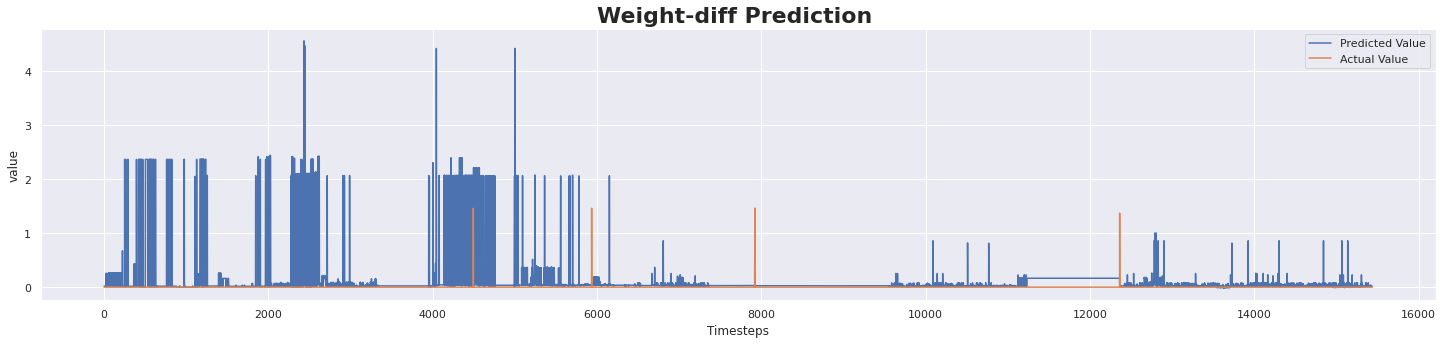

In [19]:
y_true_test = np.array(y_test, dtype = object).astype(np.float32)

y_pred_test=model.predict(X_test)
test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('Weight-diff_predictions_from_gradient_boosting_today.csv', index = None)
print('R\u00B2:{} MSE:{}'.format(r2_score(y_true_test, y_pred_test), mean_squared_error(y_true_test, y_pred_test)))
fig_verify = plt.figure(figsize=(25, 5))
plt.plot(y_pred_test,label = 'Predicted Value')
plt.plot(y_true_test, label = 'Actual Value')
plt.title('Weight-diff Prediction ', fontsize=22, fontweight='bold')
plt.ylabel('value')
plt.xlabel('Timesteps')
plt.legend()
plt.show()
fig_verify.savefig("model_regression_verify.png")

Plotting last 24 hours 

 MSE:0.1612063343356514


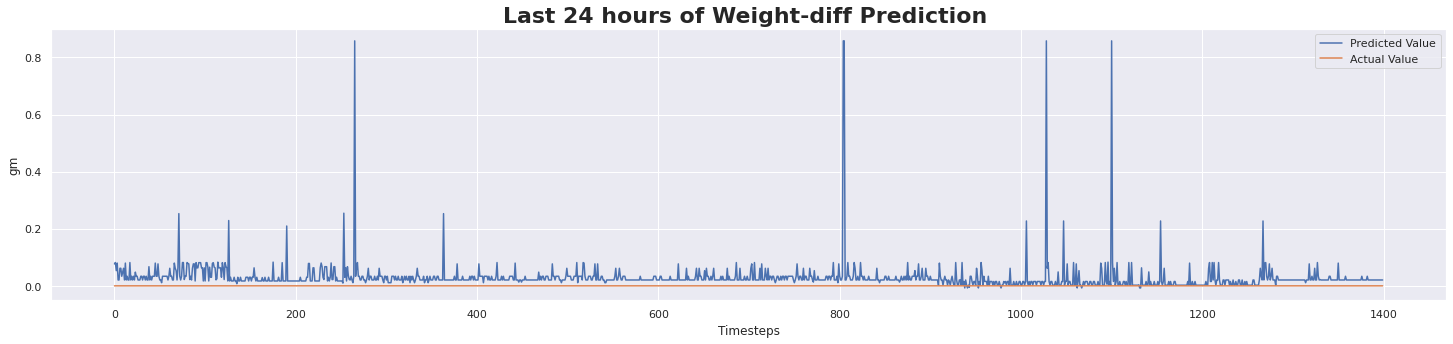

In [21]:
y_true_test = np.array(y_test, dtype = object).astype(np.float32)

y_pred_test=model.predict(X_test)
test_set = pd.DataFrame(y_pred_test)
test_set.to_csv('Weight-diff_predictions_from_gradient_boosting_today.csv', index = None)
print(' MSE:{}'.format(mean_squared_error(y_true_test, y_pred_test)))
fig_verify = plt.figure(figsize=(25, 5))
plt.plot(y_pred_test[-1400:],label = 'Predicted Value')
plt.plot(y_true_test[-1400:], label = 'Actual Value')
plt.title('Last 24 hours of Weight-diff Prediction ', fontsize=22, fontweight='bold')
plt.ylabel('gm')
plt.xlabel('Timesteps')
plt.legend()
plt.show()
fig_verify.savefig("model_regression_verify.png")